In [1]:
%%capture
!pip install numpy resampy tensorflow==2.8 tf_slim six soundfile

In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
from inference import *

filepath = "/Users/francesco.bonzi/Documents/datasets/jamendo/audio/01 - A smile on your face.mp3"
infer = Inference()
prediction = infer(filepath)

55336


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:332: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  warnings.warn('`tf.layers.flatten` is deprecated and '


INFO:tensorflow:Restoring parameters from /Users/francesco.bonzi/Documents/openmic-2018/openmic/vggish/_model/vggish_model.ckpt


accordion


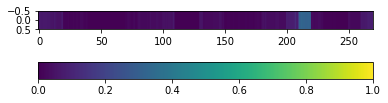

banjo


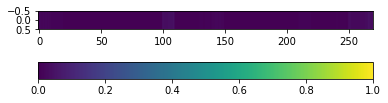

bass


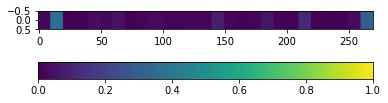

cello


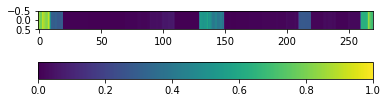

clarinet


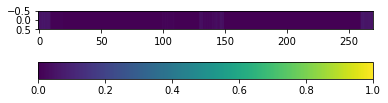

cymbals


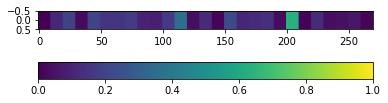

drums


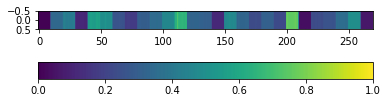

flute


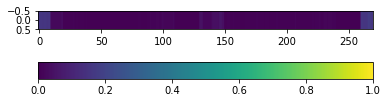

guitar


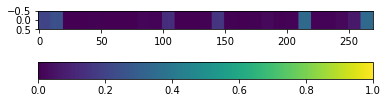

mallet_percussion


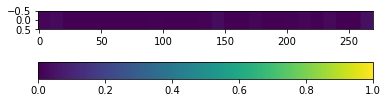

mandolin


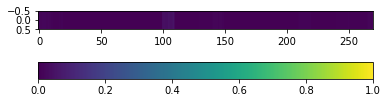

organ


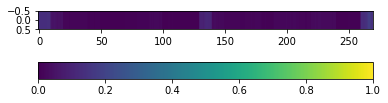

piano


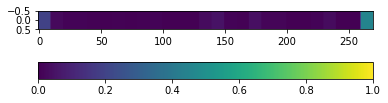

saxophone


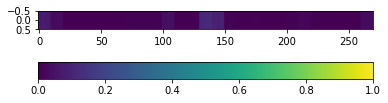

synthesizer


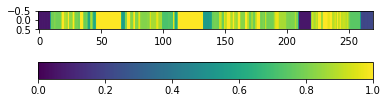

trombone


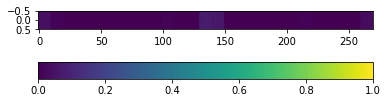

trumpet


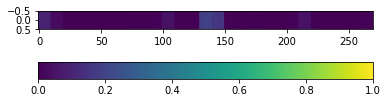

ukulele


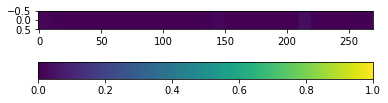

violin


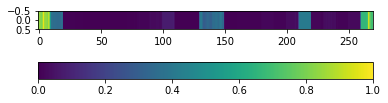

voice


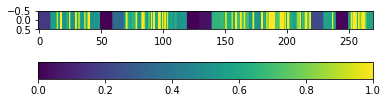

In [16]:
plot(prediction)

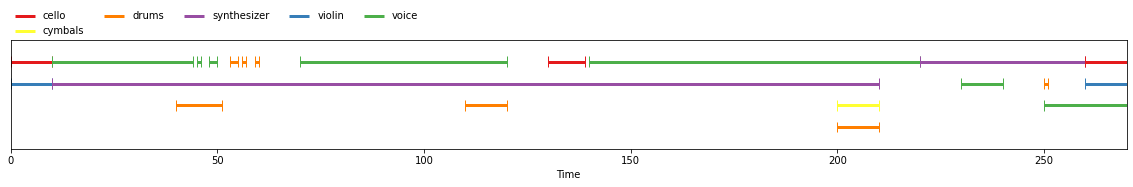

In [6]:
annotation = to_annotation(prediction, filepath)
annotation

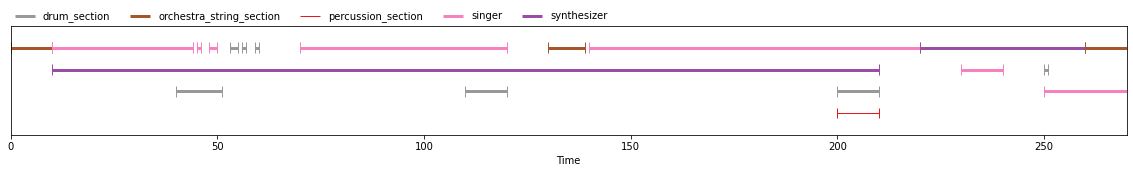

In [9]:
merge_classes(annotation)

In [8]:
import IPython

IPython.display.Audio(filepath)

In [19]:
from pyannote.database import get_protocol, FileFinder
from pyannote.audio.tasks import *
from inference import *

# load dataset
preprocessors = {"audio": FileFinder()}
protocol = get_protocol(
    'MedleyDB2.Protocol.MedleyDB2Protocol', preprocessors=preprocessors)

# load model
infer = Inference()

FileNotFoundError: "pyannote.database" relies on a YAML configuration file but could not find any. Here are the locations that were looked for: /Users/francesco.bonzi/Desktop/AttentionMIC/database.yml, /Users/francesco.bonzi/.pyannote/database.yml.

In [ ]:
from pyannote.metrics.diarization import *
from tqdm import tqdm

metrics = [
    DiarizationErrorRate(),
    DiarizationCompleteness(),
    DiarizationCoverage(),
    DiarizationPurity(),
    DiarizationPurityCoverageFMeasure()
]

for file in tqdm(protocol.test()):
    
    print(file["audio"])
    break
    
    # apply the voice activity detection pipeline
    prediction = infer(file)
    prediction = merge_classes(to_annotation(prediction))
    
    # evaluate its output
    for metric in metrics:
        _ = metric(
            file['annotation'],
            prediction
        )
    
# aggregate the performance over the whole test set
for metric in metrics:
    detection_metric = abs(metric)
    print(f'{metric.metric_name()} = {detection_metric * 100:.1f}%')